In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from nltk.sentiment import SentimentIntensityAnalyzer
from nltk.corpus import stopwords
import nltk
import numpy as np

# Ensure required resources for nltk are downloaded
nltk.download('vader_lexicon')
nltk.download('stopwords')


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\sidhe\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sidhe\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [20]:
import pandas as pd

# List of Excel files
file_list = [
    "B:\OneDrive - Amity University\Desktop\Infosys\Approved_datasets\dataset_1_2_3_combined.xlsx",
    "B:\OneDrive - Amity University\Desktop\Infosys\Approved_datasets\dataset4.xlsx",
   "B:\OneDrive - Amity University\Desktop\Infosys\Approved_datasets\dataset5.xlsx",
   "B:\OneDrive - Amity University\Desktop\Infosys\Approved_datasets\dataset6.xlsx",
    "B:\OneDrive - Amity University\Desktop\Infosys\Approved_datasets\dataset7.xlsx",
   "B:\OneDrive - Amity University\Desktop\Infosys\Approved_datasets\dataset8.xlsx",
   "B:\OneDrive - Amity University\Desktop\Infosys\Approved_datasets\dataset9.xlsx"
]

# Read and concatenate the files
dataframes = []
for file in file_list:
    df = pd.read_excel(file)
    dataframes.append(df)

# Concatenate all the DataFrames
data = pd.concat(dataframes, ignore_index=True)


In [21]:
print(data.shape)         # Number of rows and columns
print(data.columns)       # Column names
print(data.head())        # Preview the first few rows


(3174, 9)
Index(['ID', 'Name', 'Role', 'Transcript', 'Resume', 'decision',
       'Reason for decision', 'Job Description',
       'Here's a simulated interview for a Software Engineer role:\n\n**Interviewer:** Hi Alice, thank you for coming in today. Can you start by telling me a little bit about your background and why you're interested in this Software Engineer role?\n\n**Alice Smith:** Yeah, sure. So, I have a degree in computer science, and I've been working in the field for about three years now. I'm interested in this role because I enjoy coding and problem-solving, and I think this company does some really interesting work.\n\n**Interviewer:** Great, thanks for sharing that. Can you walk me through your experience with a specific programming language? Let's say Java. How have you used Java in previous projects?\n\n**Alice Smith:** Um, I've used Java before...I think. I mean, I've written some Java code, but I don't really remember the specifics. I've worked on a few projects th


--- Missing Values ---
ID                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              

C:\Users\sidhe\AppData\Local\Temp\ipykernel_16108\2156625392.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='Role', data=data, order=data['Role'].value_counts().index, palette="viridis")


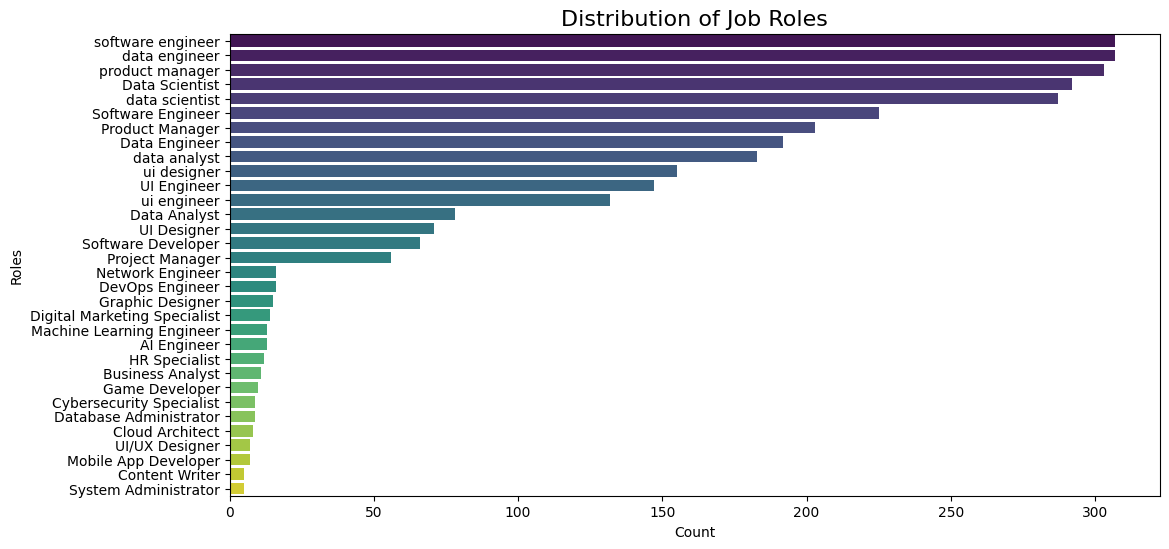

C:\Users\sidhe\AppData\Local\Temp\ipykernel_16108\2156625392.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='decision', data=data, palette="coolwarm")


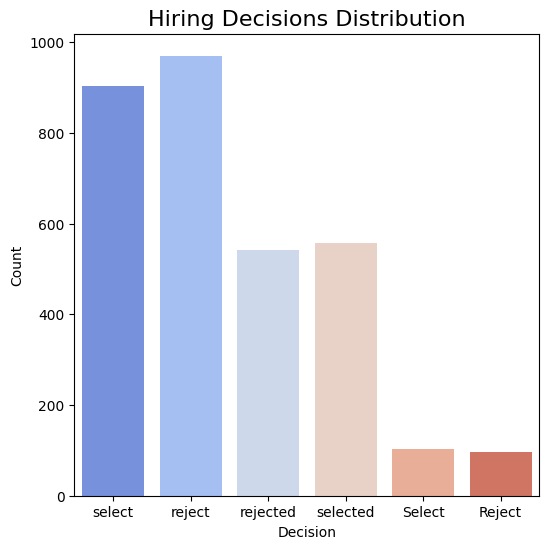

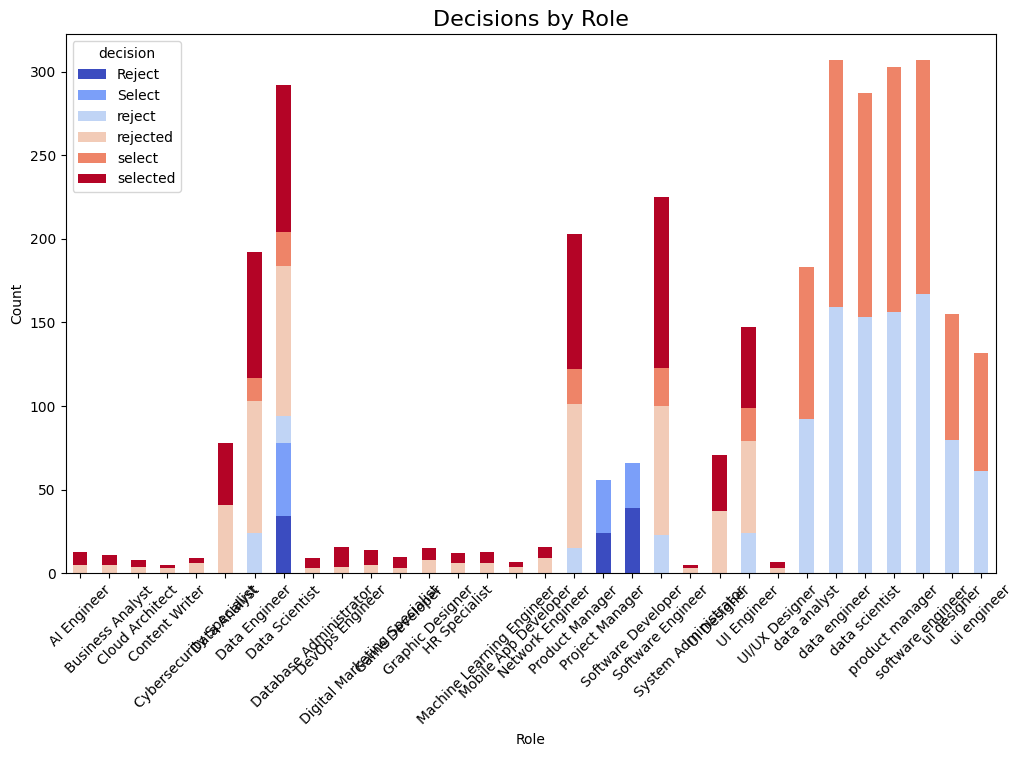

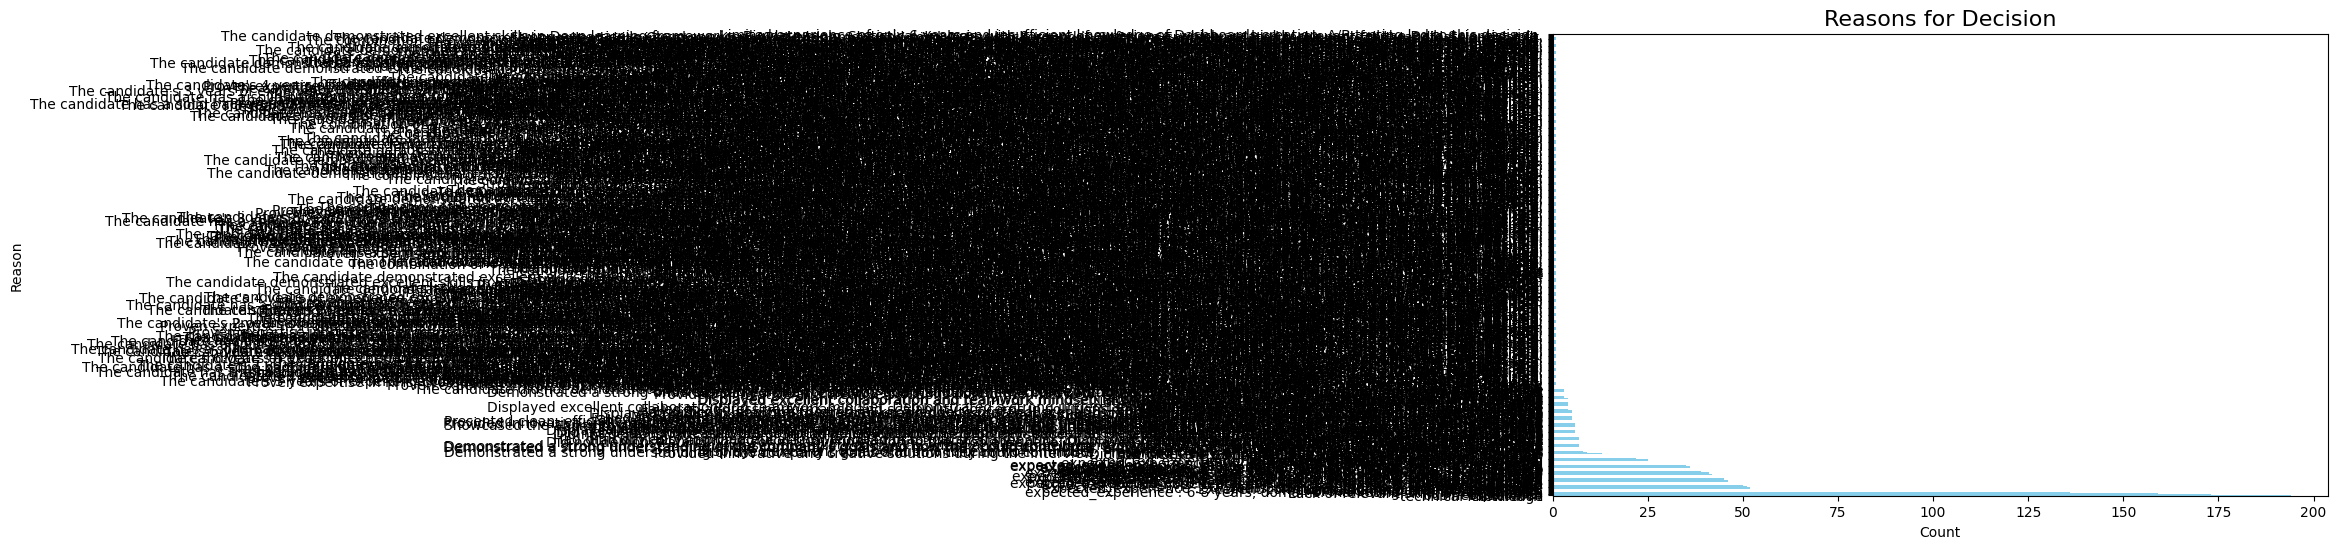

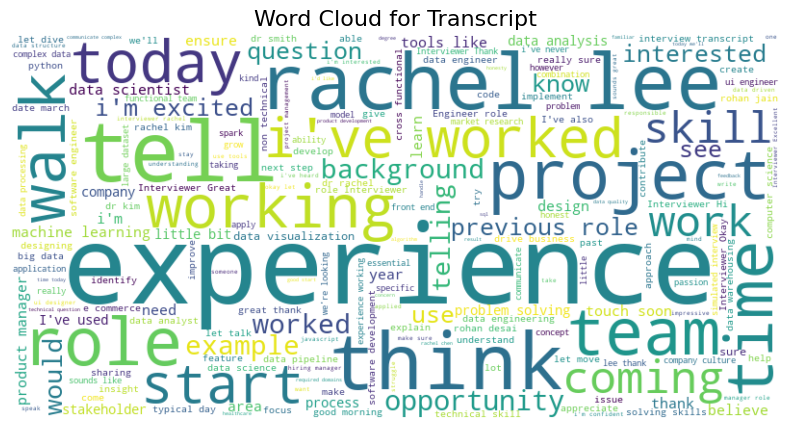

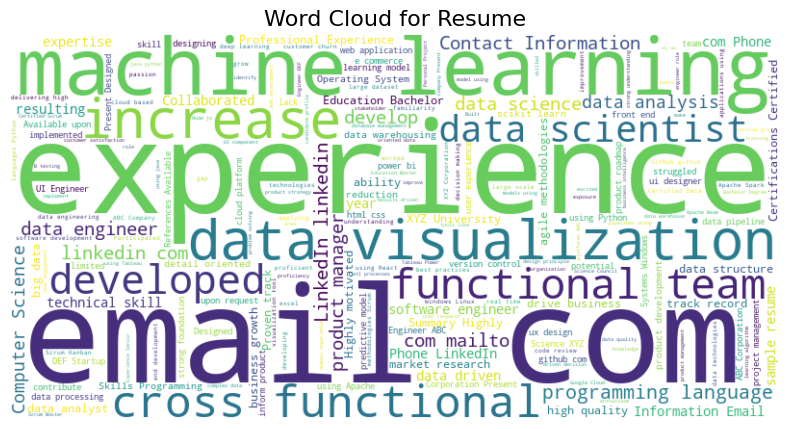

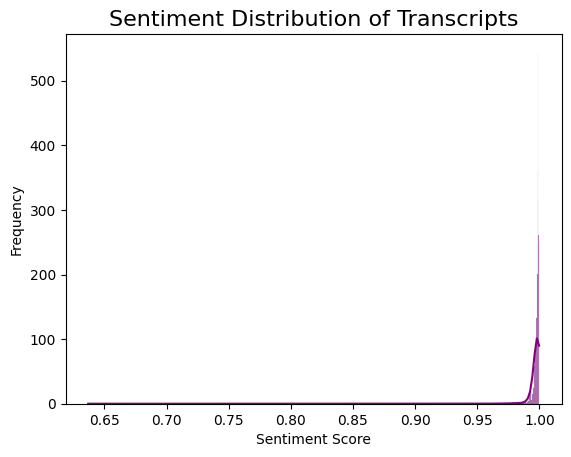

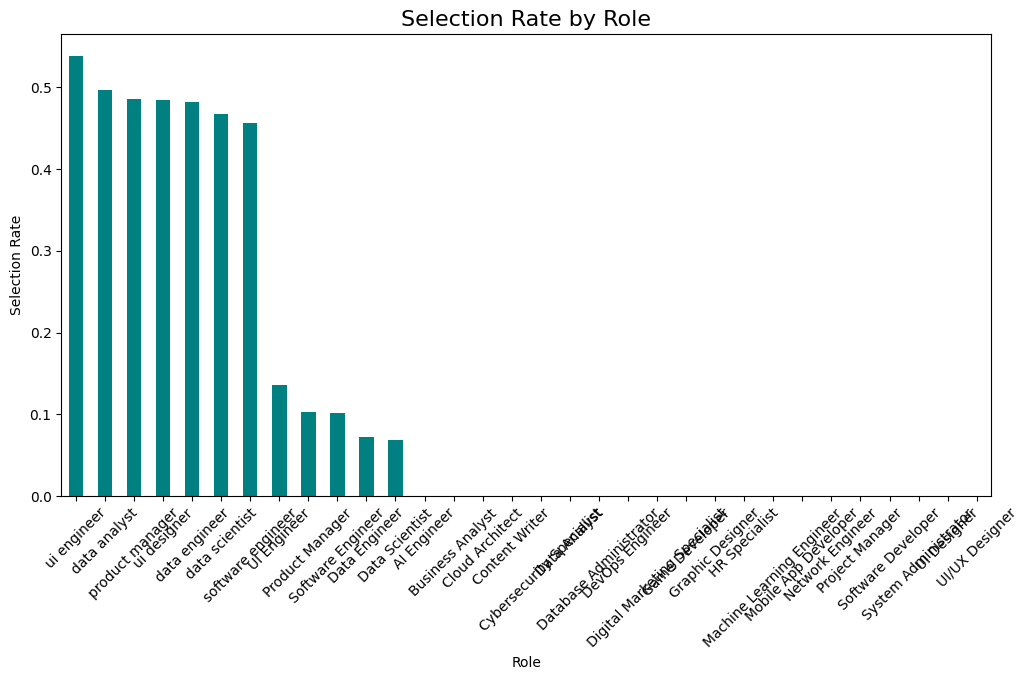

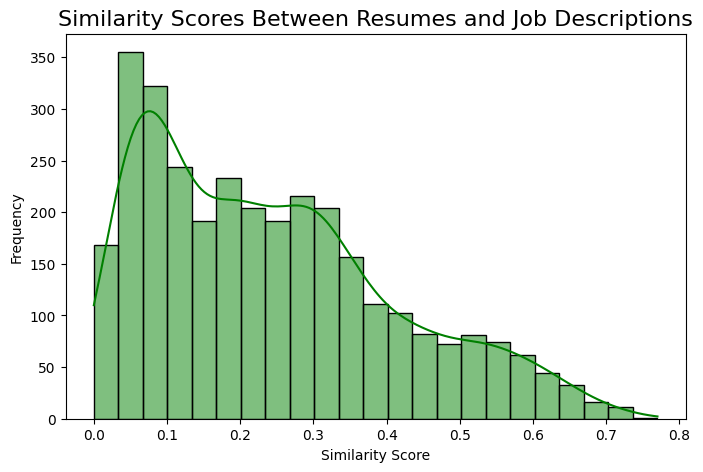

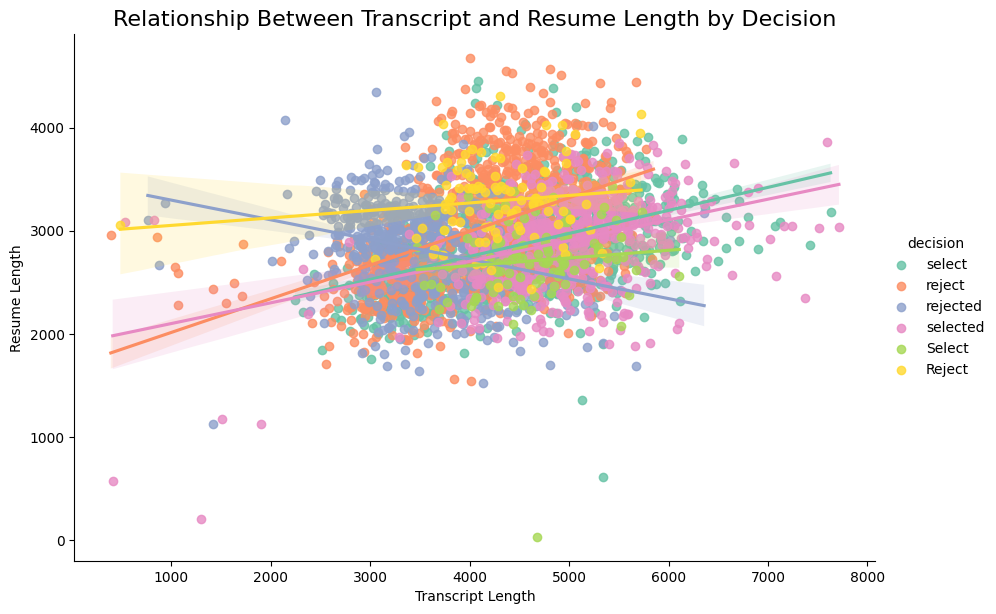

C:\Users\sidhe\AppData\Local\Temp\ipykernel_16108\2156625392.py:108: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Frequency', y='Bigram', data=bigram_df, palette='Blues_d')


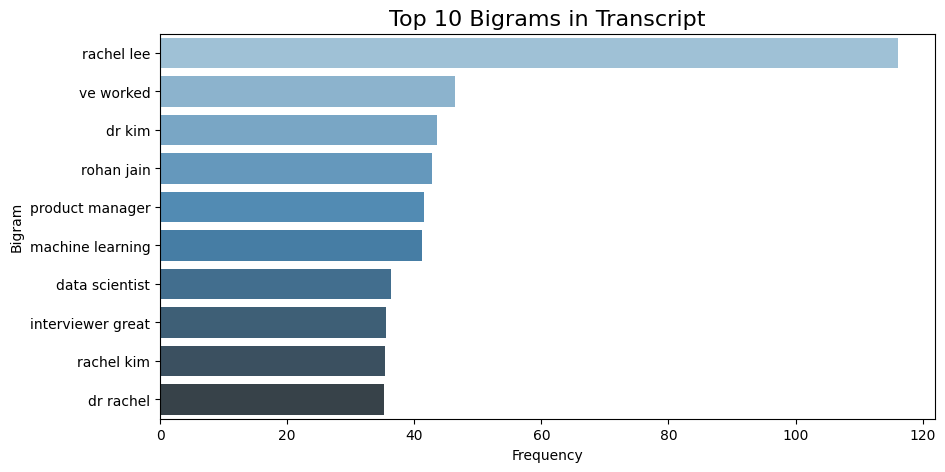

C:\Users\sidhe\AppData\Local\Temp\ipykernel_16108\2156625392.py:108: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Frequency', y='Bigram', data=bigram_df, palette='Blues_d')


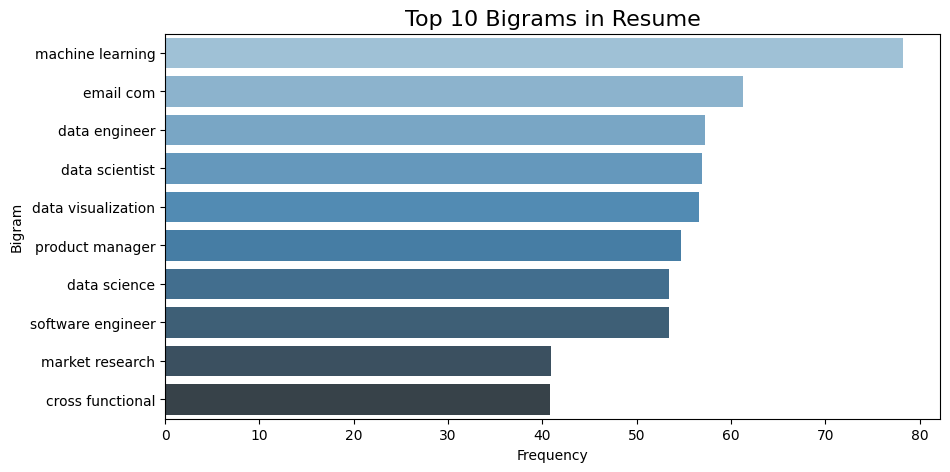

Enhanced dataset with additional features saved as Final_EDA_Infy_output.csv


In [22]:
# General Overview
print("\n--- Missing Values ---")
print(data.isnull().sum())
print("\n--- Duplicate Entries ---")
print(data.duplicated().sum())

# Distribution of roles and decisions
plt.figure(figsize=(12, 6))
sns.countplot(y='Role', data=data, order=data['Role'].value_counts().index, palette="viridis")
plt.title('Distribution of Job Roles', fontsize=16)
plt.xlabel('Count')
plt.ylabel('Roles')
plt.show()

plt.figure(figsize=(6, 6))
sns.countplot(x='decision', data=data, palette="coolwarm")
plt.title('Hiring Decisions Distribution', fontsize=16)
plt.xlabel('Decision')
plt.ylabel('Count')
plt.show()

# Decision Analysis
role_decision = data.groupby(['Role', 'decision']).size().unstack()
role_decision.plot(kind='bar', stacked=True, figsize=(12, 7), colormap='coolwarm')
plt.title('Decisions by Role', fontsize=16)
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

reason_decision = data['Reason for decision'].value_counts()
reason_decision.plot(kind='barh', figsize=(10, 6), color='skyblue')
plt.title('Reasons for Decision', fontsize=16)
plt.xlabel('Count')
plt.ylabel('Reason')
plt.show()

# Text Data Insights
# Word Cloud for Transcripts and Resumes
stop_words = set(stopwords.words('english'))

for column in ['Transcript', 'Resume']:
    text = " ".join(data[column].dropna())
    wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=stop_words).generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Word Cloud for {column}', fontsize=16)
    plt.show()

# Sentiment Analysis on Transcripts
sia = SentimentIntensityAnalyzer()
data['Transcript Sentiment'] = data['Transcript'].apply(lambda x: sia.polarity_scores(x)['compound'])
sns.histplot(data['Transcript Sentiment'], kde=True, color="purple")
plt.title('Sentiment Distribution of Transcripts', fontsize=16)
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.show()

# Role-Specific Trends
role_selection_rate = data[data['decision'] == 'select']['Role'].value_counts() / data['Role'].value_counts()
role_selection_rate.sort_values(ascending=False).plot(kind='bar', figsize=(12, 6), color='teal')
plt.title('Selection Rate by Role', fontsize=16)
plt.ylabel('Selection Rate')
plt.xlabel('Role')
plt.xticks(rotation=45)
plt.show()

# Job Description and Resume Matching
def compute_similarity(row):
    vectorizer = TfidfVectorizer(stop_words='english')
    tfidf_matrix = vectorizer.fit_transform([row['Job Description'], row['Resume']])
    return cosine_similarity(tfidf_matrix[0:1], tfidf_matrix[1:2])[0][0]

data['Similarity Score'] = data.apply(compute_similarity, axis=1)
plt.figure(figsize=(8, 5))
sns.histplot(data['Similarity Score'], kde=True, color="green")
plt.title('Similarity Scores Between Resumes and Job Descriptions', fontsize=16)
plt.xlabel('Similarity Score')
plt.ylabel('Frequency')
plt.show()

# Correlations
# Length of transcripts and resumes
data['Transcript Length'] = data['Transcript'].apply(len)
data['Resume Length'] = data['Resume'].apply(len)
sns.lmplot(x='Transcript Length', y='Resume Length', hue='decision', data=data, height=6, aspect=1.5, palette="Set2")
plt.title('Relationship Between Transcript and Resume Length by Decision', fontsize=16)
plt.xlabel('Transcript Length')
plt.ylabel('Resume Length')
plt.show()

# Advanced Analysis: Keyword Analysis and N-grams
from collections import Counter

def get_top_ngrams(text_series, n=2, top_k=10):
    vectorizer = TfidfVectorizer(ngram_range=(n, n), stop_words='english')
    tfidf_matrix = vectorizer.fit_transform(text_series)
    sum_words = tfidf_matrix.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vectorizer.vocabulary_.items()]
    sorted_words = sorted(words_freq, key=lambda x: x[1], reverse=True)
    return sorted_words[:top_k]

# Top Bigrams in Transcripts and Resumes
for column in ['Transcript', 'Resume']:
    top_bigrams = get_top_ngrams(data[column].dropna(), n=2, top_k=10)
    bigram_df = pd.DataFrame(top_bigrams, columns=['Bigram', 'Frequency'])
    plt.figure(figsize=(10, 5))
    sns.barplot(x='Frequency', y='Bigram', data=bigram_df, palette='Blues_d')
    plt.title(f'Top 10 Bigrams in {column}', fontsize=16)
    plt.xlabel('Frequency')
    plt.ylabel('Bigram')
    plt.show()

# Save enhanced dataset for further analysis
data.to_csv("B:\OneDrive - Amity University\Desktop\Infosys\File\dataassign-2\Final_EDA_Infy_output.csv", index=False)
print("Enhanced dataset with additional features saved as Final_EDA_Infy_output.csv")

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\sidhe\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sidhe\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!



--- Missing Values ---
ID                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              

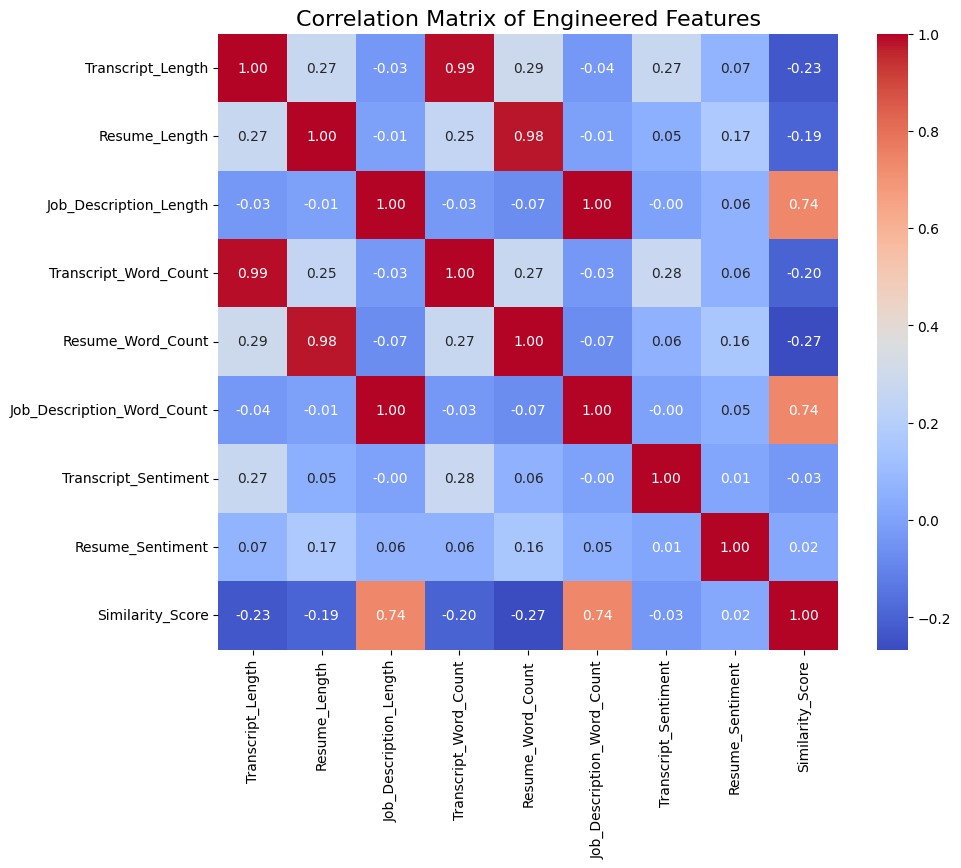

Feature engineered dataset saved as data.to_csv('Infy_EDA_Feature Engineering_insights.csv


In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from nltk.sentiment import SentimentIntensityAnalyzer
from nltk.corpus import stopwords
import nltk
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import TruncatedSVD

# Ensure required resources for nltk are downloaded
nltk.download('vader_lexicon')
nltk.download('stopwords')


# General Overview
print("\n--- Missing Values ---")
print(data.isnull().sum())
print("\n--- Duplicate Entries ---")
print(data.duplicated().sum())

# Feature Engineering
# Encode categorical variables
label_encoder = LabelEncoder()
data['Role_encoded'] = label_encoder.fit_transform(data['Role'])
data['Decision_encoded'] = label_encoder.fit_transform(data['decision'])

# Text length features
data['Transcript_Length'] = data['Transcript'].apply(len)
data['Resume_Length'] = data['Resume'].apply(len)
data['Job_Description_Length'] = data['Job Description'].apply(len)

# Word count features
data['Transcript_Word_Count'] = data['Transcript'].apply(lambda x: len(x.split()))
data['Resume_Word_Count'] = data['Resume'].apply(lambda x: len(x.split()))
data['Job_Description_Word_Count'] = data['Job Description'].apply(lambda x: len(x.split()))

# Sentiment features
sia = SentimentIntensityAnalyzer()
data['Transcript_Sentiment'] = data['Transcript'].apply(lambda x: sia.polarity_scores(x)['compound'])
data['Resume_Sentiment'] = data['Resume'].apply(lambda x: sia.polarity_scores(x)['compound'])

# Similarity scores
def compute_similarity(row):
    vectorizer = TfidfVectorizer(stop_words='english')
    tfidf_matrix = vectorizer.fit_transform([row['Job Description'], row['Resume']])
    return cosine_similarity(tfidf_matrix[0:1], tfidf_matrix[1:2])[0][0]

data['Similarity_Score'] = data.apply(compute_similarity, axis=1)

# Feature Extraction using TF-IDF and SVD (Dimensionality Reduction)
vectorizer = TfidfVectorizer(stop_words='english', max_features=100)
tfidf_matrix = vectorizer.fit_transform(data['Transcript'])
svd = TruncatedSVD(n_components=10, random_state=42)
svd_features = svd.fit_transform(tfidf_matrix)

# Add SVD features to the dataset
for i in range(svd_features.shape[1]):
    data[f'SVD_Feature_{i+1}'] = svd_features[:, i]

# Correlation Matrix
def plot_correlation_matrix(df, features, title):
    corr_matrix = df[features].corr()
    plt.figure(figsize=(10, 8))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
    plt.title(title, fontsize=16)
    plt.show()

# Visualize correlations of engineered features
engineered_features = ['Transcript_Length', 'Resume_Length', 'Job_Description_Length',
                       'Transcript_Word_Count', 'Resume_Word_Count', 'Job_Description_Word_Count',
                       'Transcript_Sentiment', 'Resume_Sentiment', 'Similarity_Score']
plot_correlation_matrix(data, engineered_features, 'Correlation Matrix of Engineered Features')

# Save the dataset with new features
data.to_csv('Infy_EDA_Feature Engineering_insights.csv')
print("Feature engineered dataset saved as data.to_csv('Infy_EDA_Feature Engineering_insights.csv")

